# **Linear Regression & Multiple Regression**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
file_path =("/content/data_file.csv.xlsx")
df = pd.read_excel(file_path)

In [ ]:
# Display the first few rows of the dataset
# df.head()
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# **EDA**

In [ ]:
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


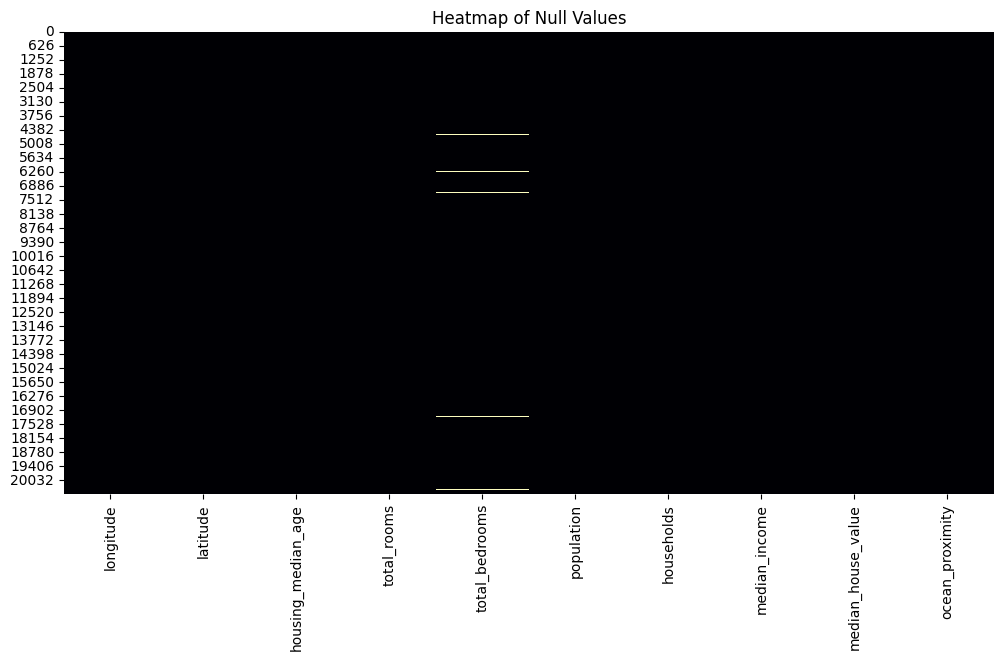

In [ ]:
# Heat map of null values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Null Values')
plt.show()

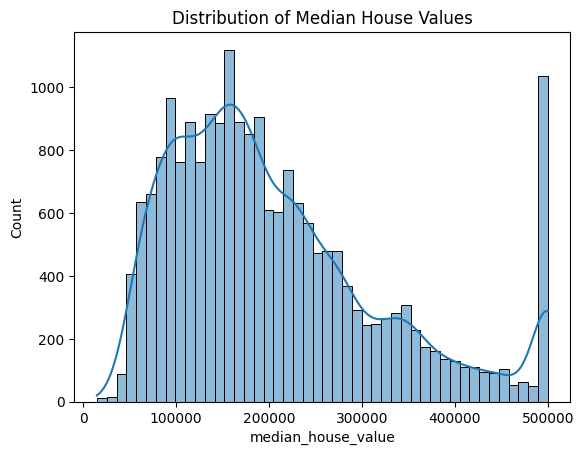

In [ ]:
# Visualizing the distribution of important features
if 'median_house_value' in df.columns:
    sns.histplot(df['median_house_value'], kde=True)
    plt.title('Distribution of Median House Values')
    plt.show()
else:
    print("'median_house_value' column not found in the dataset")

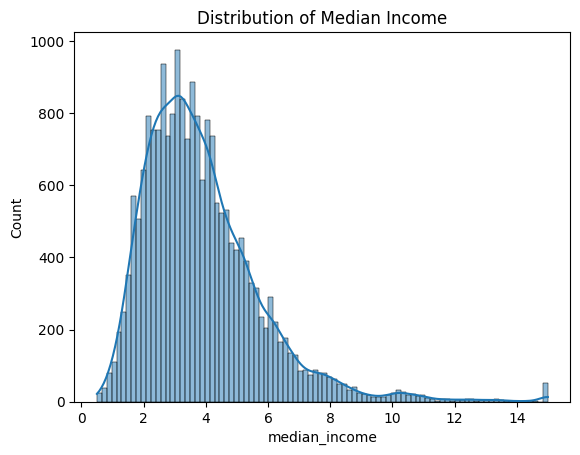

In [ ]:
# Check if 'income' or similar column exists in the dataset
if 'income' in df.columns:
    sns.histplot(df['income'], kde=True)
    plt.title('Distribution of Income')
    plt.show()
elif 'median_income' in df.columns:
    sns.histplot(df['median_income'], kde=True)
    plt.title('Distribution of Median Income')
    plt.show()
else:
    print("'income' or 'median_income' column not found in the dataset")
df_encoded = pd.get_dummies(df, drop_first=True)

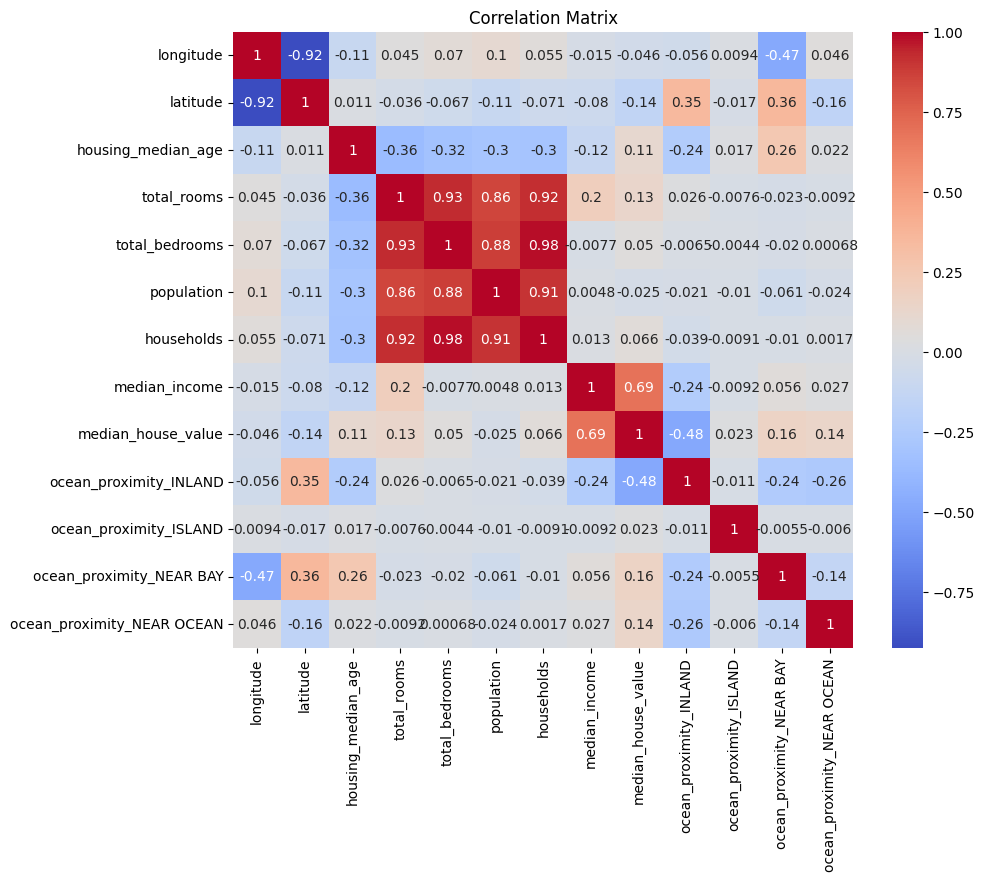

In [ ]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Data Preprocessing**

In [ ]:
#data processing
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Fill missing values for numerical columns with the median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [ ]:
# Fill missing values for categorical columns with the most frequent value (mode)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Verify that there are no more missing values
print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


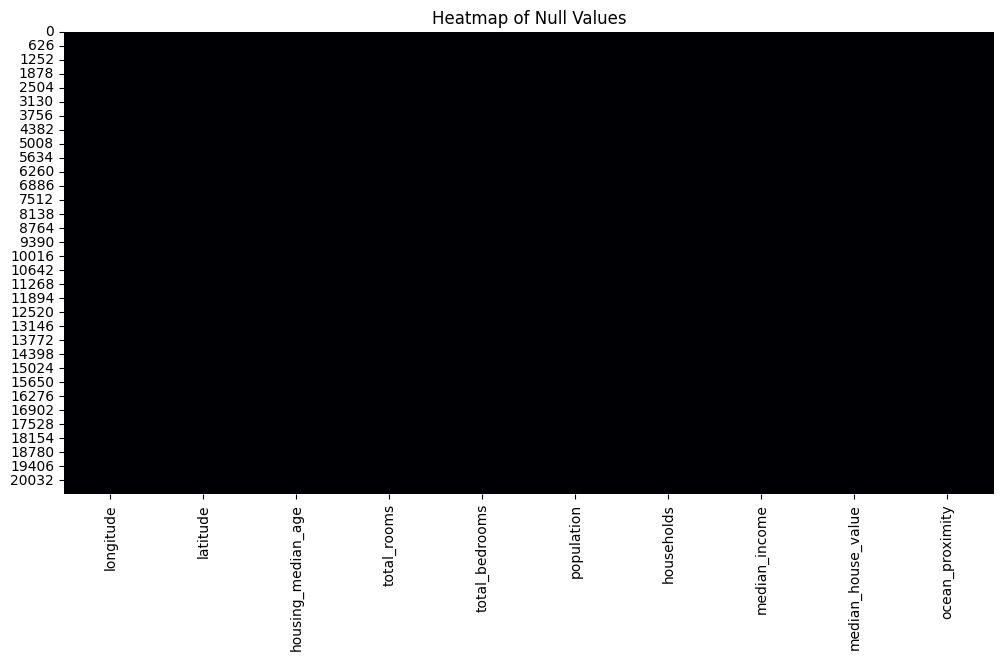

In [ ]:
# Again plot the Heat map of null values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Heatmap of Null Values')
plt.show()

# **Test and Train the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_simple = df['median_income']
y_simple = df['median_house_value']

In [ ]:
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

In [ ]:
X_train_simple.shape, X_test_simple.shape

((16512,), (4128,))

In [ ]:
y_train_simple.shape, y_test_simple.shape

((16512,), (4128,))

# **Model Selection - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_simple = LinearRegression()

In [ ]:
# Reshape X_train_simple to a 2D array
X_train_simple = X_train_simple.values.reshape(-1, 1)

# Reshape X_test_simple to a 2D array as well for predictions later
X_test_simple = X_test_simple.values.reshape(-1, 1)

In [ ]:
model_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [ ]:
y_pred_simple = model_simple.predict(X_test_simple)

# **Checking Accuracy and MSE & RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
print(f"Simple Linear Regression - MSE: {mse_simple}")

Simple Linear Regression - MSE: 7091157771.76555


In [ ]:
r2_simple = r2_score(y_test_simple, y_pred_simple)
print(f"Simple Linear Regression - R2: {r2_simple}")

Simple Linear Regression - R2: 0.45885918903846656


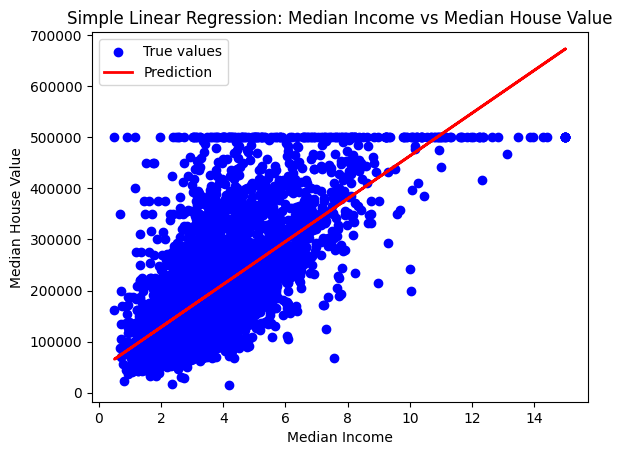

In [ ]:
# Result
plt.scatter(X_test_simple, y_test_simple, color='blue', label='True values')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Prediction')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression: Median Income vs Median House Value')
plt.legend()
plt.show()

In [ ]:
plt.figure(1)  # Select the first figure (Simple Linear Regression)
plt.savefig('simple_regression_plot.png')

<Figure size 640x480 with 0 Axes>

# **Multiple Linear Regression**

In [ ]:
# For categorical variable 'ocean_proximity', we need to do add dummies
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [ ]:
# Multiple independent variables
X_multiple = df[['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
                + [col for col in df.columns if 'ocean_proximity' in col]]
y_multiple = df['median_house_value']

In [ ]:
# Split the data into training and test sets (70% for training, 30% for testing)
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.3, random_state=33)

In [ ]:
model_multiple = LinearRegression()

In [ ]:
model_multiple.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [ ]:
y_pred_multiple = model_multiple.predict(X_test_multiple)

In [ ]:
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
print(f"Multiple Linear Regression - MSE: {mse_multiple}")

Multiple Linear Regression - MSE: 4885697262.786553


In [ ]:
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
print(f"Multiple Linear Regression - R2: {r2_multiple}")

Multiple Linear Regression - R2: 0.6358510473371813


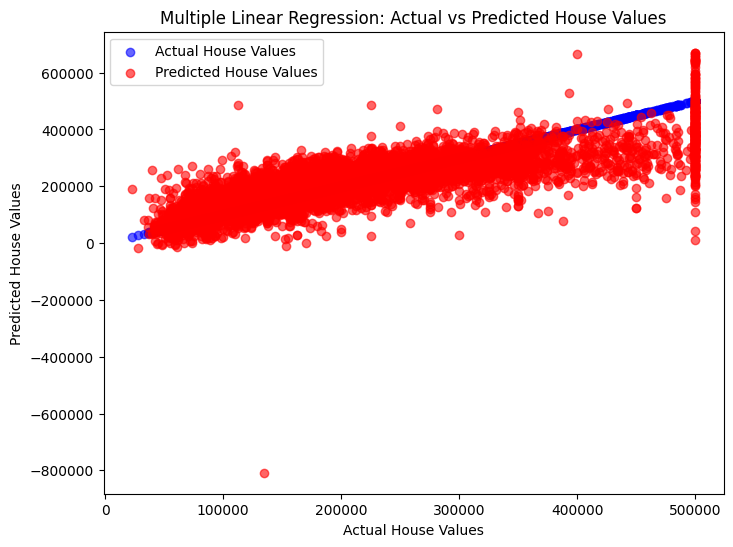

In [ ]:
# Plot the actual vs predicted house values with different colors for better understanding
plt.figure(figsize=(8, 6))

# Plot actual house values (true values) in blue
plt.scatter(y_test_multiple, y_test_multiple, color='blue', label='Actual House Values', alpha=0.6)

# Plot predicted house values in red
plt.scatter(y_test_multiple, y_pred_multiple, color='red', label='Predicted House Values', alpha=0.6)

plt.xlabel('Actual House Values')
plt.ylabel('Predicted House Values')
plt.title('Multiple Linear Regression: Actual vs Predicted House Values')

plt.legend()

plt.show()


In [ ]:
plt.figure(2)  # Select the second figure (Multiple Linear Regression)
plt.savefig('multiple_regression_plot.png')

<Figure size 640x480 with 0 Axes>